In [103]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import robust_scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [104]:
def clean(df):
    df.drop("Name", axis=1, inplace=True)
    df.drop("Ticket", axis=1, inplace=True)

    df["Cabin"].fillna(value="Z0", inplace=True)
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Embarked"].fillna("U", inplace=True)
    df["Fare"].fillna(df["Fare"].median(), inplace=True)
    
    df["CC"] = [x[0] for x in df["Cabin"]]
    df["CN"] = [x[1:] for x in df["Cabin"]]
    df.drop("Cabin", axis=1, inplace=True)
    
    se = LabelEncoder()
    ee = LabelEncoder()
    ce = LabelEncoder()

    df["Sex"] = se.fit_transform(df["Sex"])
    df["Embarked"] = ee.fit_transform(df["Embarked"])
    df["CC"] = ce.fit_transform(df["CC"])
    
    df['CN'] = df['CN'].apply(lambda x: '0' if x == "" else x)
    df['CN'] = df['CN'].apply(lambda x: '0' if len(x) > 3 else x)
    df["CN"] = df["CN"].astype("int16")
    
    df["Fare"] = robust_scale(df["Fare"])
    ageScaler = StandardScaler()
    df["Age"] = ageScaler.fit_transform(df[["Age"]])
    CNScaler = StandardScaler()
    df["CN"] = CNScaler.fit_transform(df[["CN"]])
            
    return df

In [105]:
training_df = clean(pd.read_csv("data/train.csv"))
testing_df = clean(pd.read_csv("data/test.csv"))

## END CLEANING

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC

X = training_df.drop("Survived", axis=1)
y = training_df["Survived"]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [153]:
y_pred = model.predict(X_test) 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       168
           1       0.80      0.74      0.77       100

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.84      0.83       268



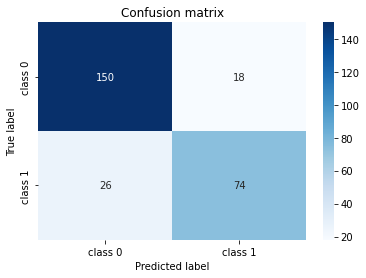

In [154]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))


# Create a sample confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap with the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['class 0', 'class 1'], yticklabels=['class 0', 'class 1'])

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [147]:
output = model.predict(testing_df)

In [148]:
submission_df = pd.DataFrame({
    "PassengerId": testing_df["PassengerId"],
    "Survived": output
})
submission_df.to_csv("output.csv", index=False)

In [68]:
def findNans(df):
    col_missing_rows = df["Age"].isna().sum()
    missing_rows = df.isna().any(axis=1).sum()

    missing_values = df.isna().sum()

    for col, num_missing in missing_values.iteritems():
        print(f"{col}: {num_missing}")


    print(col_missing_rows)
    print(missing_rows)

In [69]:
findNans(testing_df)

PassengerId: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0
CC: 0
CN: 0
0
0
